# STAT107 Project 2 

## Regional Video Games Sales





### Information

Specifically, the data in the **sample_game_sales.csv** file contains the following attributes.

* **Name** - The game's name

* **Platform** - Platform of the game's release (i.e. PC,PS4, etc.)

* **Year** - Year of the game's release

* **Genre** - Genre of the game

* **NA_Sales** - Sales in North America (in millions)

* **EU_Sales** - Sales in Europe (in millions)

* **JP_Sales** - Sales in Japan (in millions)

* **Other_Sales** - Sales in the rest of the world (in millions)




       
      


## Section 1: DataSet

I choose this dataset because I am interested in video games and curios about sales of different games in different countries. 
In this analysis, we would like to discuss the relationship between video games sales in different regions around the globe (North America, Europe, Japan, and Other) as well as their relationship to the genre of the game,  the platform of the game's release, and the year that the game was released.

The data in the **sample_game_sales.csv** file contains a **random sample** of game attributes that were originally scraped online. Each game that was scraped had at least 100,000 games sold globally.

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.regression.linear_model as lm 
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Data Preprocessing and Cleaning



In [2]:
df =pd.read_csv('sample_game_sales.csv')
df.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Need for Speed: Most Wanted,WiiU,2013,Racing,0.14,0.12,0.00,0.02
1,Taito Legends Power Up,PSP,2007,Action,0.05,0,0.00,0.00
2,Magic: The Gathering - Battlegrounds,XB,2003,Strategy,0.12,0.03,0.00,0.01
3,Shrek the Third,X360,2007,Action,0.54,0.1,0.00,0.06
4,Destiny Links,DS,2009,Role-Playing,0.00,0,0.01,0.00


In [3]:
df.shape

(1000, 8)

In [4]:
df.dtypes

Name            object
Platform        object
Year            object
Genre           object
NA_Sales       float64
EU_Sales        object
JP_Sales       float64
Other_Sales    float64
dtype: object

In [5]:
for col in ['Platform', 'Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    print('Unique values for the '+col+' column.')
    print(df[col].unique())
    print()

Unique values for the Platform column.
['WiiU' 'PSP' 'XB' 'X360' 'DS' 'Wii' 'PS3' 'PS2' 'PSV' 'PS' 'SAT' 'GC'
 'SNES' '3DS' 'DC' 'GBA' 'PC' 'PS4' 'XOne' 'N64' '2600' 'GB' 'NES' 'WS'
 'GEN']

Unique values for the Year column.
['2013' '2007' '2003' '2009' '2006' '2002' '2010' '2011' '2008' '2012'
 'unknown' '1997' '2005' '1994' '1996' '1995' '1999' '2001' '2000' '2004'
 '1992' '2015' '2016' '2014' '1981' '1998' '1991' '1990' '1993' '1987'
 '1980' '1989' '1985' '1986' '1984' '1982' '1988']

Unique values for the Genre column.
['Racing' 'Action' 'Strategy' 'Role-Playing' 'Adventure' 'Sports' 'Puzzle'
 'Simulation' 'Platform' 'Shooter' 'Misc' 'Fighting']

Unique values for the NA_Sales column.
[1.400e-01 5.000e-02 1.200e-01 5.400e-01 0.000e+00 1.000e-01 2.600e-01
 3.000e-02 3.700e-01 1.600e-01 4.000e-02 5.600e-01 1.500e-01 1.700e-01
 2.200e-01 2.900e-01 1.090e+00 1.400e+00 7.000e-02 3.000e-01 2.700e-01
 8.900e-01 6.400e-01 9.200e-01 7.200e-01 1.800e-01 2.320e+00 1.000e-02
 2.000e-01 4.800e

In [6]:
df = pd.read_csv('sample_game_sales.csv', na_values = ['unknown'])


In [7]:
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [8]:
df = df.dropna()
df.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.14,0.12,0.00,0.02
1,Taito Legends Power Up,PSP,2007.0,Action,0.05,0.00,0.00,0.00
2,Magic: The Gathering - Battlegrounds,XB,2003.0,Strategy,0.12,0.03,0.00,0.01
3,Shrek the Third,X360,2007.0,Action,0.54,0.10,0.00,0.06
4,Destiny Links,DS,2009.0,Role-Playing,0.00,0.00,0.01,0.00


In [9]:
df.shape

(982, 8)

### 1.2. Filtering for Specific Genres

There are many game genres in this dataset. To simplify this analysis, we would like to focus on only the following 4 types of genres:
* Action
* Role-Playing
* Fighting
* Shooter

Filter your dataset to contain just these four genres.

In [10]:
df1 = df[(df['Genre'] == 'Action') | (df['Genre'] == 'Role-Playing') | (df['Genre'] == 'Fighting') | (df['Genre'] == 'Shooter')]
df1.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Taito Legends Power Up,PSP,2007.0,Action,0.05,0.00,0.00,0.00
3,Shrek the Third,X360,2007.0,Action,0.54,0.10,0.00,0.06
4,Destiny Links,DS,2009.0,Role-Playing,0.00,0.00,0.01,0.00
12,Saints Row IV,PS3,2013.0,Action,0.56,0.44,0.09,0.21
14,Final Fantasy XI,X360,2006.0,Role-Playing,0.17,0.01,0.00,0.01


### 1.3. Top 5 Platforms

In [11]:
df1['Platform'].value_counts()

Platform
PS2     45
X360    43
PS3     37
PSP     34
DS      31
PS      28
PC      26
3DS     21
GBA     21
XB      20
Wii     19
GC      13
N64     12
XOne    11
PS4     11
SNES     9
2600     7
WiiU     6
PSV      6
SAT      4
NES      3
GB       2
DC       1
Name: count, dtype: int64

In [15]:
df1 = df1[(df1['Platform'] == 'PS2') | (df1['Platform'] == 'X360') | (df1['Platform'] == 'PS3') | (df1['Platform'] == 'PSP') | (df1['Platform'] == 'DS')]
df1.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Taito Legends Power Up,PSP,2007.0,Action,0.05,0.00,0.00,0.00
3,Shrek the Third,X360,2007.0,Action,0.54,0.10,0.00,0.06
4,Destiny Links,DS,2009.0,Role-Playing,0.00,0.00,0.01,0.00
12,Saints Row IV,PS3,2013.0,Action,0.56,0.44,0.09,0.21
14,Final Fantasy XI,X360,2006.0,Role-Playing,0.17,0.01,0.00,0.01


## Section 2: Exploratory Data Analysis

### 2.1. Numerical Variable Pairwise Relationships


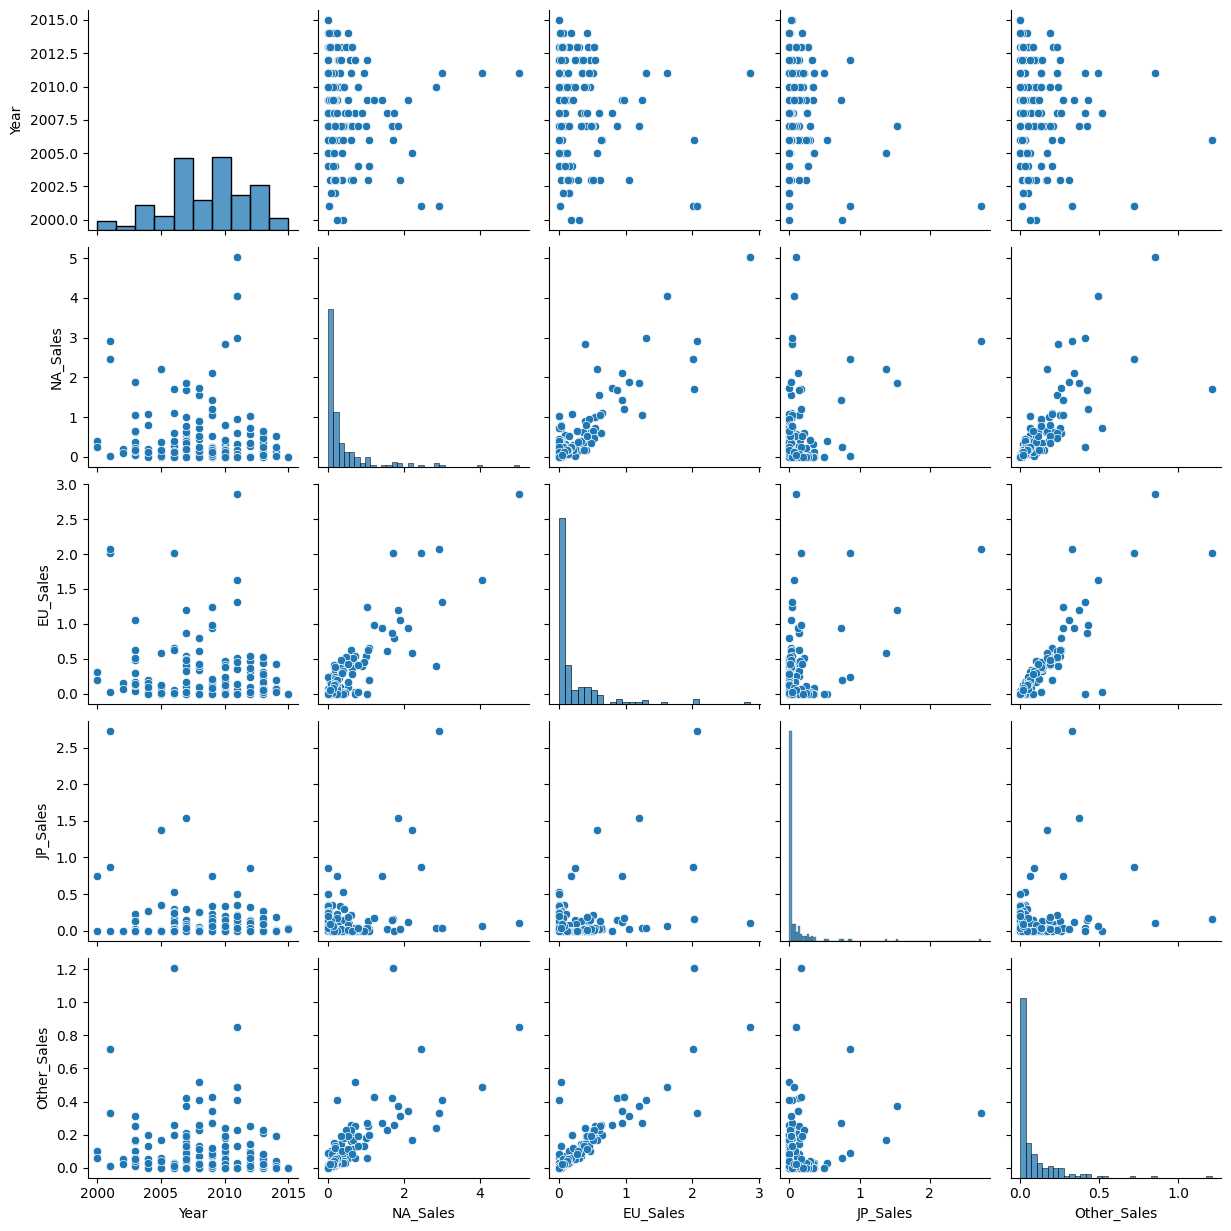

In [16]:
sns.pairplot(df1)
plt.show()

In [18]:
df1.corr(numeric_only=True)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,1.000000,-0.101545,-0.119341,-0.187205,-0.112706
NA_Sales,-0.101545,1.000000,0.878340,0.352546,0.782950
EU_Sales,-0.119341,0.878340,1.000000,0.409199,0.877006
JP_Sales,-0.187205,0.352546,0.409199,1.000000,0.232658
Other_Sales,-0.112706,0.782950,0.877006,0.232658,1.000000


### 2.2. Numerical Variables Pairwise Relationship Strength


From the pairplot and correlation coefficient above, we can tell:
1. 'year' variable does not have strong association with any of the 4 regional sales variables
2. 'NA_Sales' has the strongest linear relationship with the 'year' variable
3. 'JP_Sales' and 'Other_Sales' have the weakest relationship with each other. 

### 2.3. The Relationship between Genre in Japanese vs. North American Sales

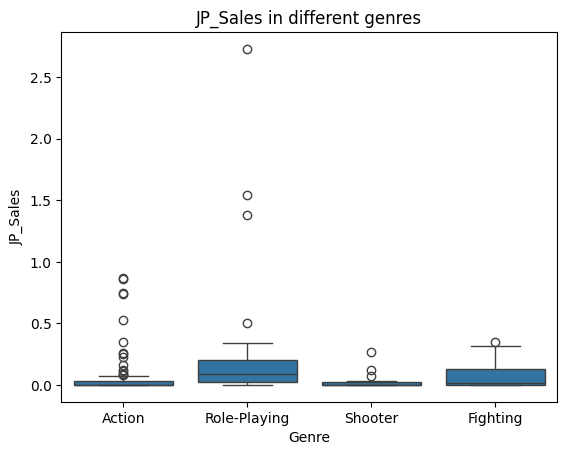

In [19]:
sns.boxplot(x = 'Genre', y = 'JP_Sales', data = df1)
plt.title('JP_Sales in different genres')
plt.show()

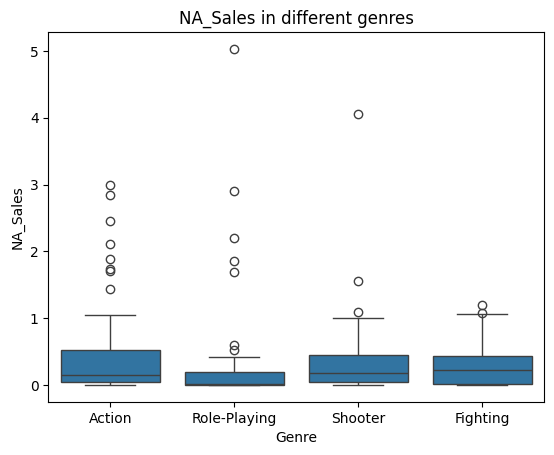

In [20]:
sns.boxplot(x = 'Genre', y = 'NA_Sales', data = df1)
plt.title('NA_Sales in different genres')
plt.show()

Conclusion: buyers in Japan and North America do not have the same preferemce when it comes to different genres of games. As we can see in the plots, the distribution of sales are different. 

## Section 3: Exploratory Data Visualization:


In [23]:
temp = pd.crosstab(df1['Platform'], df1['Genre'], normalize = 'index')
temp

Genre,Action,Fighting,Role-Playing,Shooter
Platform,,,,
DS,0.419355,0.032258,0.451613,0.096774
PS2,0.444444,0.155556,0.222222,0.177778
PS3,0.378378,0.270270,0.162162,0.189189
PSP,0.470588,0.088235,0.352941,0.088235
X360,0.511628,0.069767,0.162791,0.255814


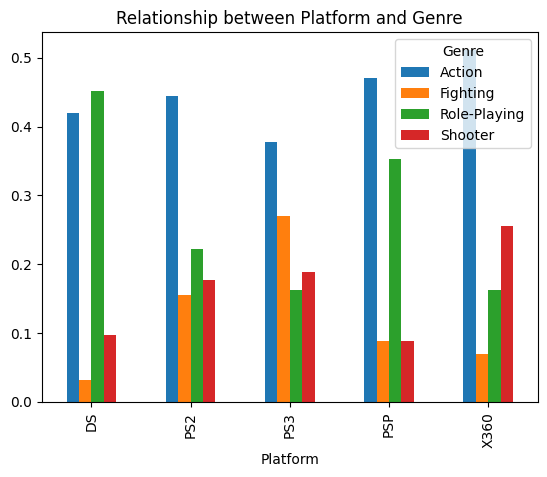

In [24]:
temp.plot.bar()
plt.title('Relationship between Platform and Genre')
plt.show()

Conclusion:
1. PS3 has the lowest percentage of role-playong games.
2. 16.216% of this platform's games were role-playing games.

## Section 4: Data Science:


### 4.1: Interference:

Hypotheses:

$ H_{0} : \mu_{rp} - \mu_{a} = 0$

$ H_{A} : \mu_{rp} - \mu_{a} \neq 0$

Checking conditions for Inference:



1. Sample of role-playing games is randomly selected from the population of all role-playing games that were sold globally before 2016, coming from DS, PS2, PS3, PSP, and X360 platforms that had at least more than 100,000 sales globally.

2. $n_{rp}$ = 49 < 10% of the population of all role-playing games that were sold globally before 2016, coming from DS, PS2, PS3, PSP, and X360 platforms that had at least more than 100,000 sales globally.

3. $n_{rp}$ = 49 > 30.

4. Sample of action games is randomly selected from the population of all action games that were sold globally before 2016, coming from DS, PS2, PS3, PSP, and X360 platforms that had at least more than 100,000 sales globally.

5. $n_{a}$ = 85 < 10% of the population of all action games that were sold globally before 2016, coming from DS, PS2, PS3, PSP, and X360 platforms that had at least more than 100,000 sales globally.

6. $n_{a}$ = 85 > 30.

7. The samples of role-playing and action games are independent (there was no pairwise relationship in the way in which we collected the two samples).

In [29]:
rp = df1[df1['Genre'] == 'Role-Playing']
n_rp = len(rp)
print('value of role_playing game count is: ', n_rp)

value of role_playing game count is:  49


In [30]:
action = df1[df1['Genre'] == 'Action']
n_action = len(action)
print('value of action game count is: ', n_action)

value of action game count is:  85


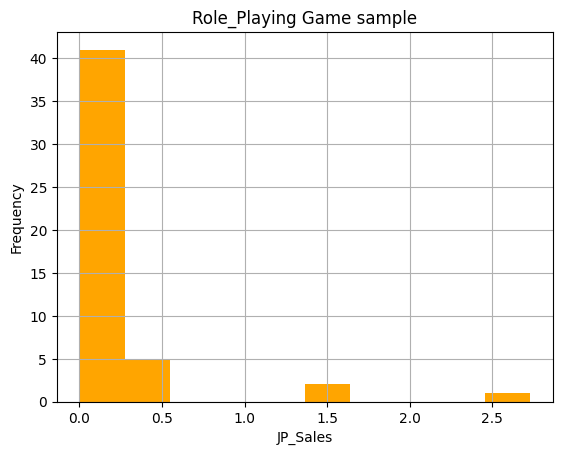

In [31]:
rp['JP_Sales'].hist(color='orange') 
plt.title('Role_Playing Game sample') 
plt.xlabel('JP_Sales') 
plt.ylabel('Frequency') 
plt.show() 

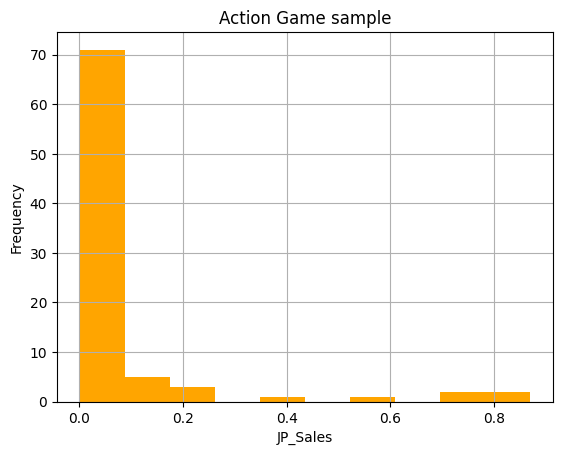

In [32]:
action['JP_Sales'].hist(color='orange') 
plt.title('Action Game sample') 
plt.xlabel('JP_Sales') 
plt.ylabel('Frequency') 
plt.show() 

### Confidence Interval
90% confidence interval for $\mu_{rp}-\mu_{a}$ (ie. the difference between the average number of role-playing games sold in Japan in our population of role-playing games and the average number of action games sold in Japan in our population of action games).

In [33]:
from scipy.stats import t
critical_value = t.ppf(0.95, df = 48)
print('critical value of the confidence interval is: ', critical_value)

critical value of the confidence interval is:  1.6772241953450393


In [35]:
sample_rp_mean = rp['JP_Sales'].mean()
sample_action_mean = action['JP_Sales'].mean()
point_estimate = sample_rp_mean - sample_action_mean
point_estimate

0.14837695078031213

In [36]:
sample_rp_std = rp['JP_Sales'].std()
sample_action_std = action['JP_Sales'].std()
standard_error = np.sqrt((sample_rp_std**2)/n_rp + (sample_action_std**2)
/n_action) 
standard_error 

0.06981755532433521

In [37]:
lower_bound = point_estimate - critical_value*standard_error 
upper_bound = point_estimate + critical_value*standard_error 
print('Our confidence interval is: (', lower_bound, upper_bound, ')') 

Our confidence interval is: ( 0.031277257730496236 0.26547664383012803 )


Description: We are 90% confident that the difference in the average JP_Sales of all role-playing games and the average JP_Sales of all action games that were sold globally before 2016, coming from DS, PS2, PS3, PSP, and X360 platforms that had at least more than 100,000 sales globally, is between 0.03127725 and 0.2654766

### Hypothesis Test Conclusion with a Confidence Interval

Because the null value $\mu_{rp} - \mu_{a} = 0$ was not in the confidence interval, we reject the null hypothesis. Thus there is sufficient evidence to suggest $\mu_{rp} - \mu_{a} \neq 0$ (or in other words, that there is an association between JP_Sales and whether the game is role-playing or action). 

### Test Statistics

In [40]:
null_value = 0
test_stat = (point_estimate - null_value)/standard_error
print('The test statistics is :', test_stat)

The test statistics is : 2.1252097712535445


### p-value


In [41]:
pvalue = 2*(1 - t.cdf(np.abs(test_stat), df = 48))
print('p-value is :', pvalue)

p-value is : 0.038743200234060415


Conclusion: 


Because the pvalue = 0.038743200234060415 < $\alpha = 0.1$, we reject the null hypothesis. Thus there is sufficient evidence to suggest $\mu_{rp} - \mu_{a} \neq 0$ (or in other words, that there is an association between JP_Sales and whether the game is role-playing or action).

### Sampling Distribution




In [42]:
samples = []
for i in range(500):
    samples.append(df.sample(100, replace = True)['JP_Sales'].mean())

In [43]:
sample = pd.DataFrame(data = samples, columns = ['mean'])
sample.head()

,mean
0,0.1322
1,0.1287
2,0.1557
3,0.1066
4,0.0953


### Linear Regression Variable Selection

Let's build a linear regression model that predicts **North America game sales numbers** given the following set of explanatory variables:
* Japan sales numbers
* European sales number
* other region sales numbers
* Genre
* Platform
* Year




### Features Matrix

In [44]:
X = df[['JP_Sales', 'EU_Sales', 'Other_Sales', 'Genre', 'Platform', 'Year']]
X.head()

,JP_Sales,EU_Sales,Other_Sales,Genre,Platform,Year
0,0.00,0.12,0.02,Racing,WiiU,2013.0
1,0.00,0.00,0.00,Action,PSP,2007.0
2,0.00,0.03,0.01,Strategy,XB,2003.0
3,0.00,0.10,0.06,Action,X360,2007.0
4,0.01,0.00,0.00,Role-Playing,DS,2009.0


In [45]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,JP_Sales,EU_Sales,Other_Sales,Year,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,...,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SNES,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,0.00,0.12,0.02,2013.0,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,0.00,0.00,0.00,2007.0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.00,0.03,0.01,2003.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.00,0.10,0.06,2007.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.01,0.00,0.00,2009.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
y = df['NA_Sales']
y.head()

0    0.14
1    0.05
2    0.12
3    0.54
4    0.00
Name: NA_Sales, dtype: float64

### Non-Regularized Linear Regression Model

perform **k=5 fold cross validation** on a **non-regularized linear regression model**

In [47]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score
finalmod = LinearRegression()
scores0 = cross_val_score(finalmod, X, y, cv=5, 
                          scoring="neg_mean_squared_error")
print("CV MSE scores:", -scores0)
print("Average MSE:", round(-scores0.mean(), 2))
print("Std. error:", round(scores0.std()/np.sqrt(len(scores0)), 2))

CV MSE scores: [0.21949152 0.80410033 2.83554387 0.35467819 0.36810772]
Average MSE: 0.92
Std. error: 0.44


### LASSO Linear Regression Model




#### Cross-Validation for the LASSO Linear Regression with $\lambda=0.1$


In [48]:
from sklearn.linear_model import LassoCV
model_1 = LassoCV(cv=5, alphas=[0.1]).fit(X, y)

In [49]:
model_1.alphas_

array([0.1])

In [50]:
test_mse_df_1= pd.DataFrame(model_1.mse_path_, columns=model_1.alphas_, index=['test_fold_%s_avg_MSE'%(str(i)) for i in range(1,6)])
test_mse_df_1

,0.1
test_fold_1_avg_MSE,0.179351
test_fold_2_avg_MSE,0.362941
test_fold_3_avg_MSE,3.536751
test_fold_4_avg_MSE,0.401443
test_fold_5_avg_MSE,0.215648


In [51]:
test_mse_df_1[0.1].mean()

0.9392269121043857

In [52]:
pd.DataFrame(model_1.coef_, columns=['Best_LASSO_Slopes'], index=X.columns)

,Best_LASSO_Slopes
JP_Sales,0.897450
EU_Sales,0.913709
Other_Sales,0.000000
Year,-0.016565
Genre_Adventure,-0.000000
Genre_Fighting,-0.000000
Genre_Misc,-0.000000
Genre_Platform,0.000000
Genre_Puzzle,-0.000000
Genre_Racing,-0.000000


#### Cross-Validation for the LASSO Linear Regression with $\lambda=0.5$


In [53]:
model_5 = LassoCV(cv=5, alphas=[0.5]).fit(X, y)

In [54]:
test_mse_df_5= pd.DataFrame(model_5.mse_path_, columns=model_5.alphas_, index=['test_fold_%s_avg_MSE'%(str(i)) for i in range(1,6)])
test_mse_df_5

,0.5
test_fold_1_avg_MSE,0.345153
test_fold_2_avg_MSE,0.464644
test_fold_3_avg_MSE,4.845861
test_fold_4_avg_MSE,1.854547
test_fold_5_avg_MSE,0.255460


In [55]:
test_mse_df_5[0.5].mean()

1.553133256436981

In [56]:
pd.DataFrame(model_5.coef_, columns=['Best_LASSO_Slopes'], index=X.columns)

,Best_LASSO_Slopes
JP_Sales,0.000000
EU_Sales,0.000000
Other_Sales,0.000000
Year,-0.021487
Genre_Adventure,-0.000000
Genre_Fighting,0.000000
Genre_Misc,-0.000000
Genre_Platform,0.000000
Genre_Puzzle,-0.000000
Genre_Racing,-0.000000


#### Comparison of different LASSO Model


the model with $\lambda$ = 0.1 is better, because the average MSE is lower. the results would help me remove the 'Other_Sales' variable to select reduced model. 

#### Best Overall Model:
1. the non-regularized linear regression model,
2. the LASSO linear regression model with regularization parameter $\lambda=0.1$, and 
3. the LASSO linear regression model with regularization parameter $\lambda=0.5$,


In comparison, the non-regularized linear regression model, because it has the lowest average MSE of 0.92. We would expect the reduced model to have a better performance.  

### Full vs. Reduced Models using Adjusted $R^2$

#### Full Model Adjusted $R^2$

In [57]:
full_mod = smf.ols('NA_Sales ~ JP_Sales + EU_Sales + Other_Sales + Genre + Platform + Year', data = df).fit()
full_rsquare = full_mod.rsquared_adj
full_rsquare

0.681406995454565

#### Reduced Model Adjusted $R^2$


In [58]:
reduced_mod = smf.ols('NA_Sales ~ JP_Sales + EU_Sales + Year', data = df).fit()
reduced_rsquare = reduced_mod.rsquared_adj
reduced_rsquare

0.6540249538523779

#### Conclusion


1. the adjusted R-squared looks at whether additional input variables are contributing to the model.
2. the adjusted R-squared of full model is higher, so the full model will more likely perform better for new dataset. 

### Full Linear Regression Model - Inference and Predictions

Next, let's fit our **full linear regression model** given all 6 explanatory variables:
* Japan sales numbers
* European sales number
* other region sales numbers
* Genre
* Platform
* Year.


In [59]:
df2 = df[(df['Platform'] == 'DS') | (df['Platform'] == 'PS2') | (df['Platform'] == 'PS3') | (df['Platform'] == 'PSP') | (df['Platform'] == 'X360')]
full_model = smf.ols('NA_Sales ~ JP_Sales + EU_Sales + Other_Sales + Genre + Platform + Year', data = df2).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     42.99
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.05e-88
Time:                        15:42:20   Log-Likelihood:                -159.60
No. Observations:                 467   AIC:                             359.2
Df Residuals:                     447   BIC:                             442.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.5693     14.759      0.581      0.562     -20.436      37.575
Genre[T.Adventure]       -0.0621      0.065     -0.953      0.341      -0.190       0.066
Genre[T.Fighting]        -0.0162      0.082     -0.198      0.843      -0.176       0.144
Genre[T.Misc]            -0.0741      0.063     -1.185      0.237      -0.197       0.049
Genre[T.Platform]         0.1109      0.092      1.210      0.227      -0.069       0.291
Genre[T.Puzzle]          -0.0341      0.080     -0.425      0.671      -0.192       0.124
Genre[T.Racing]          -0.2337      0.082     -2.839      0.005      -0.395      -0.072
Genre[T.Role-Playing]     0.0262      0.064      0.409      0.683      -0.100       0.152
Genre[T.Shooter]          0.0249      0.074      0.339      0.735      -0.120       0.169
Genre[T.Simulation]      -0.0217      0.082     -0.266      0.790      -0.182       0.139
Genre[T.Sports]           0.0425      0.060      0.711      0.477      -0.075       0.160
Genre[T.Strategy]        -0.0592      0.084     -0.702      0.483      -0.225       0.106
Platform[T.PS2]          -0.0313      0.055     -0.572      0.567      -0.139       0.076
Platform[T.PS3]          -0.1223      0.059     -2.087      0.037      -0.237      -0.007
Platform[T.PSP]          -0.0694      0.054     -1.287      0.199      -0.175       0.037
Platform[T.X360]          0.1992      0.058      3.423      0.001       0.085       0.314
JP_Sales                  0.1255      0.082      1.528      0.127      -0.036       0.287
EU_Sales                  0.8080      0.083      9.761      0.000       0.645       0.971
Other_Sales               1.1747      0.201      5.855      0.000       0.780       1.569
Year                     -0.0042      0.007     -0.575      0.566      -0.019       0.010
==============================================================================
Omnibus:                      286.059   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7463.291
Skew:                           2.149   Prob(JB):                         0.00
Kurtosis:                      22.107   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
per = 1 - full_model.rsquared_adj
print(per*100, '% of NA_sale variability is NOT explained by this full model')

36.87215057122821 % of NA_sale variability is NOT explained by this full model


Next, to determine if there is a relationship between EU_Sales and NA_Sales in the corresponding population model. 

Hypotheses:

$H_{0} : \beta_{17} = 0$

$H_{A} : \beta_{17}\neq 0$

#### 95% Confidence Interval


In [62]:
from scipy.stats import t 
 
point_estimate = 0.8080 
print('point estimate: ', point_estimate) 
 
standard_error = 0.083 
print('standard error: ', standard_error) 
 
n=df2.shape[0] 
print('n:', n) 
 
p = 19
print('number of slopes: ', p) 
 
critical_value = t.ppf(0.975, df=n-p-1) 
print('critical value: ', critical_value) 

point estimate:  0.808
standard error:  0.083
n: 467
number of slopes:  19
critical value:  1.965285233654453


In [65]:
lower_bound = point_estimate - critical_value*standard_error 
upper_bound = point_estimate + critical_value*standard_error 
 
print('Our confidence Interval: (', lower_bound, upper_bound, ')') 

Our confidence Interval: ( 0.6448813256066804 0.9711186743933197 )


We are 95% confident that the population slope that corresponds to EU_Sales in the corresponding population model is between 0.64488 and 0.9711187

Conclusion:

Because the null value $\beta_{16} = 0$ is not inside the confidence interval, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the population slope of EU_Sales is non-zero. 

#### Test Statistic

In [68]:
test_stat = (point_estimate -0)/standard_error 
print('Our test statistics is:', test_stat) 

Our test statistics is: 9.734939759036145


#### p-value


In [70]:
pvalue = 2*(1-t.cdf(np.abs(test_stat), df=n-p-1)) 
print('Our p_value is :',pvalue) 

Our p_value is : 0.0


Conclusion:

Because the pvalue = 0 < alpha = 0.05, we reject the null hypothesis. Thus there is sufficient evidence to suggest that the population slope of EU_Sales is non-zero.

### Prediction

In [71]:
temp1 = df2[(df2['Name'] == "SpongeBob's Truth or Square") & (df2['Platform'] == 'X360')]
temp1

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
843,SpongeBob's Truth or Square,X360,2009.0,Action,0.03,0.04,0.0,0.0


In [73]:
pred = 8.5693 + 0.1992 + 0.1255*0+ 0.808*0.04+1.1747 * 0 - 0.0042*2009
print('Prediction for the NA_Sales of the game is', pred)

Prediction for the NA_Sales of the game is 0.36302000000000056


In [74]:
print('residual of the game is:', np.abs(0.03 - 0.363))

residual of the game is: 0.33299999999999996


## Logistic Regression Variable Selection

build a logistic regression model that can be used as a classifier model to predict whether or not a game is a role-playing game. 
* Year
* NA_Sales
* EU_Sales
* JP_Sales
* Other_Sales
* Platform




### Pre-Processing

Role-playing => 1

Other => 0

In [75]:
df1['y'] = 1*(df1['Genre'] == 'Role-Playing')
df1.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,y
1,Taito Legends Power Up,PSP,2007.0,Action,0.05,0.00,0.00,0.00,0
3,Shrek the Third,X360,2007.0,Action,0.54,0.10,0.00,0.06,0
4,Destiny Links,DS,2009.0,Role-Playing,0.00,0.00,0.01,0.00,1
12,Saints Row IV,PS3,2013.0,Action,0.56,0.44,0.09,0.21,0
14,Final Fantasy XI,X360,2006.0,Role-Playing,0.17,0.01,0.00,0.01,1


#### split data


In [76]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df1, 
                                   test_size=0.20, 
                                   random_state=123)
df_train

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,y
758,Resident Evil 5,X360,2009.0,Action,2.11,0.94,0.12,0.34,0
910,Pirates of the Caribbean: At World's End,PS2,2007.0,Action,0.20,0.16,0.00,0.05,0
789,Shin Sangoku Musou Online: Souten Ranbu,PS3,2010.0,Action,0.00,0.00,0.02,0.00,0
434,Dragon Ball Z: Battle of Z,X360,2014.0,Fighting,0.01,0.06,0.00,0.01,0
797,UFC Undisputed 2010,PS3,2010.0,Fighting,0.80,0.41,0.02,0.19,0
...,...,...,...,...,...,...,...,...,...
106,Street Fighter X Tekken,X360,2012.0,Fighting,0.31,0.10,0.03,0.03,0
524,Ni no Kuni: Wrath of the White Witch,PS3,2011.0,Role-Playing,0.60,0.51,0.21,0.23,1
369,Shining Hearts,PSP,2010.0,Role-Playing,0.00,0.00,0.20,0.00,1
673,True Crime: Streets of LA,PS2,2003.0,Action,1.89,1.05,0.02,0.31,0


### Full Logistic Regression Model 
explanatory variables:

* Year
* NA_Sales
* EU_Sales
* JP_Sales
* Other_Sales
* Platform

#### Fitting the Full Logistic Regression Model


In [77]:
ful_mod = smf.logit('y ~ Year + NA_Sales + EU_Sales + JP_Sales + Other_Sales + Platform', data = df_train).fit()
ful_mod.summary()

Optimization terminated successfully.
         Current function value: 0.484904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                            9
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1586
Time:                        15:53:35   Log-Likelihood:                -73.705
converged:                       True   LL-Null:                       -87.603
Covariance Type:            nonrobust   LLR p-value:                  0.001032
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -146.0549    197.186     -0.741      0.459    -532.533     240.423
Platform[T.PS2]     -0.4838      0.695     -0.696      0.486      -1.845       0.878
Platform[T.PS3]     -1.2138      0.789     -1.538      0.124      -2.760       0.333
Platform[T.PSP]      0.0211      0.610      0.035      0.972      -1.174       1.217
Platform[T.X360]    -0.7934      0.761     -1.043      0.297      -2.284       0.698
Year                 0.0724      0.098      0.737      0.461      -0.120       0.265
NA_Sales            -0.4859      1.256     -0.387      0.699      -2.948       1.976
EU_Sales            -1.7865      2.177     -0.821      0.412      -6.054       2.481
JP_Sales             3.5621      1.115      3.194      0.001       1.377       5.748
Other_Sales         -0.2269      5.452     -0.042      0.967     -10.913      10.459
====================================================================================
"""

#### 8.2.2. Predictive Probabilities

the predictive probabilities for the observations in the **test dataset.**

In [78]:
df_test['phat_test'] = ful_mod.predict(exog=df_test)
df_test['phat_test'].head() 

430    0.404216
144    0.092551
219    0.131351
14     0.152971
842    0.308349
Name: phat_test, dtype: float64

#### ROC and AUC of logistic model and test_data

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [82]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

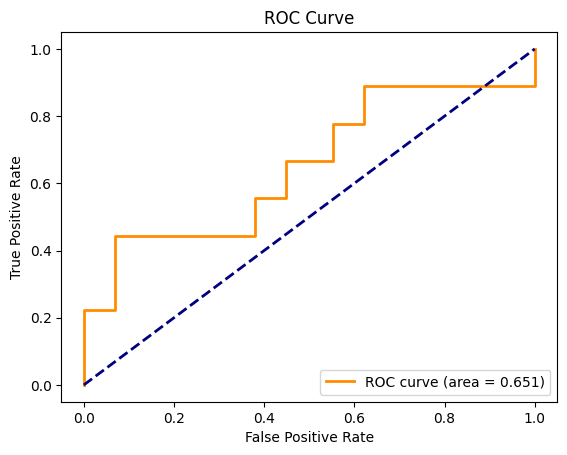

In [83]:
plot_roc(fpr, tpr, auc)

###  Reduced Models (better classification) with with Regularized Logistic Regression




In [84]:
X_train = df_train[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform']]
X_train.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform
758,2009.0,2.11,0.94,0.12,0.34,X360
910,2007.0,0.20,0.16,0.00,0.05,PS2
789,2010.0,0.00,0.00,0.02,0.00,PS3
434,2014.0,0.01,0.06,0.00,0.01,X360
797,2010.0,0.80,0.41,0.02,0.19,PS3


In [85]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_PS2,Platform_PS3,Platform_PSP,Platform_X360
758,2009.0,2.11,0.94,0.12,0.34,False,False,False,True
910,2007.0,0.20,0.16,0.00,0.05,True,False,False,False
789,2010.0,0.00,0.00,0.02,0.00,False,True,False,False
434,2014.0,0.01,0.06,0.00,0.01,False,False,False,True
797,2010.0,0.80,0.41,0.02,0.19,False,True,False,False


In [86]:
y_train = df_train['y']
y_train.head()

758    0
910    0
789    0
434    0
797    0
Name: y, dtype: int64

In [87]:
X_test = df_test[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Platform']]
X_test.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform
430,2006.0,0.00,0.00,0.12,0.00,DS
144,2012.0,0.58,0.47,0.01,0.10,X360
219,2012.0,0.28,0.33,0.13,0.14,PS3
14,2006.0,0.17,0.01,0.00,0.01,X360
842,2010.0,0.13,0.12,0.00,0.02,DS


In [88]:
X_test = pd.get_dummies(X_test, drop_first=True)
X_test.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_PS2,Platform_PS3,Platform_PSP,Platform_X360
430,2006.0,0.00,0.00,0.12,0.00,False,False,False,False
144,2012.0,0.58,0.47,0.01,0.10,False,False,False,True
219,2012.0,0.28,0.33,0.13,0.14,False,True,False,False
14,2006.0,0.17,0.01,0.00,0.01,False,False,False,True
842,2010.0,0.13,0.12,0.00,0.02,False,False,False,False


In [89]:
y_test = df_test['y']
y_test.head()

430    1
144    0
219    0
14     1
842    0
Name: y, dtype: int64

#### Reduced model 1:

LASSO Logistic Regression Model with Penalty Term $\lambda=2$ 


In [90]:
from sklearn.linear_model import LogisticRegression
lasso_mod_2 = LogisticRegression('l1', solver='liblinear', 
                          max_iter=1000, C=1/2)
lasso_mod_2.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=1000, penalty='l1', solver='liblinear')

Extract the slopes for this LASSO logistic regression model.

In [91]:
df_slope = pd.DataFrame(lasso_mod_2.coef_.T, columns=['lasso_2_slopes'], index=X_train.columns)
df_slope

,lasso_2_slopes
Year,-0.000568
NA_Sales,-0.441026
EU_Sales,0.000000
JP_Sales,1.601405
Other_Sales,0.000000
Platform_PS2,0.000000
Platform_PS3,-0.107744
Platform_PSP,0.436529
Platform_X360,-0.052914


Explain:

The results of this LASSO logistic regression model with regularization penalty  𝜆=5 suggest that only the Year, NA_Sales, JP_Sales, and Platform explanatory variables bring enough predictive power to logistic regression model to warrant leaving them in the model (as these are the only slopes in the model that are non-zero).

If we were to use these results to create a reduced model for further testing, this would indicate that we would only want to use  Year, NA_Sales, JP_Sales, and Platform as explanatory variables.

#### Reduced model 2:

an elastic net logistic regression model with penalty term $\lambda=5$ and $\alpha = 0.95$ to see what this might suggest about which explanatory variables to include/not include in our second reduced model.



In [92]:
enet_mod = LogisticRegression('elasticnet', solver='saga', 
                          max_iter=1000, C=1/5, l1_ratio=0.95)
enet_mod.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.2, l1_ratio=0.95, max_iter=1000, penalty='elasticnet',
                   solver='saga')

extract the slopes for this elastic net logistic regression model.

In [93]:
df_slope['elastic_net_slopes'] = enet_mod.coef_.T
df_slope

,lasso_2_slopes,elastic_net_slopes
Year,-0.000568,-0.000513
NA_Sales,-0.441026,0.000000
EU_Sales,0.000000,0.000000
JP_Sales,1.601405,0.000379
Other_Sales,0.000000,0.000000
Platform_PS2,0.000000,0.000000
Platform_PS3,-0.107744,0.000000
Platform_PSP,0.436529,0.000000
Platform_X360,-0.052914,0.000000


Explain:

The results of this elastic net logistic regression model with regularization penalty  𝜆=5 and  𝛼=0.9 suggest that only the Year, JP_Sales explanatory variables bring enough predictive power to logistic regression model to warrant leaving them in the model (as these are the only slopes in the model that are non-zero).
If we were to use these results to create a reduced model for further testing, this would indicate that we would only want to use Year, JP_Sales, and Platform as explanatory variables.

Conclusion:

Our LASSO logistic regression results are much more straightforward about which explanatory variables to exclude and include in a reduced model. In the LASSO model, many of the slopes are set exactly equal to 0, suggesting that these corresponding explanatory variables do not bring enough predictive power to the model. Thus we might consider excluding these explanatory variables from a reduced model to use for further testing.
Alternatively, ridge regression models will often not set any of the slopes EXACTLY equal to 0. This makes interpretation difficult as some slopes in a logistic may be:
set to be small because they do not bring enough preditive power to the model OR
the relationship between this variable and the response variable may just be naturally small.
It is more difficult to determine "how small of a slope is small enough" to determine that the corresponding variable does not contribute enough predictive power to the model.


#### Fitting Reduced Model 1


In [94]:
red_mod1 = smf.logit('y ~ Year + NA_Sales + JP_Sales + Platform', data = df_train).fit()
red_mod1.summary()

Optimization terminated successfully.
         Current function value: 0.487700
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                            7
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1538
Time:                        16:00:13   Log-Likelihood:                -74.130
converged:                       True   LL-Null:                       -87.603
Covariance Type:            nonrobust   LLR p-value:                 0.0003410
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -165.0712    194.931     -0.847      0.397    -547.129     216.987
Platform[T.PS2]     -0.4944      0.687     -0.720      0.472      -1.841       0.852
Platform[T.PS3]     -1.4146      0.753     -1.879      0.060      -2.890       0.061
Platform[T.PSP]     -0.0395      0.606     -0.065      0.948      -1.227       1.148
Platform[T.X360]    -0.9416      0.743     -1.267      0.205      -2.398       0.515
Year                 0.0819      0.097      0.844      0.399      -0.108       0.272
NA_Sales            -1.2754      0.720     -1.772      0.076      -2.686       0.135
JP_Sales             3.3996      1.080      3.148      0.002       1.283       5.516
====================================================================================
"""

#### Predictive Probabilities


In [95]:
df_test['phat_test'] = red_mod1.predict(exog=df_test)
df_test['phat_test'].head() 

430    0.408744
144    0.126413
219    0.165835
14     0.126138
842    0.350849
Name: phat_test, dtype: float64

####  ROC and AUC


In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr1, tpr1, score1 = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc1 = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [97]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

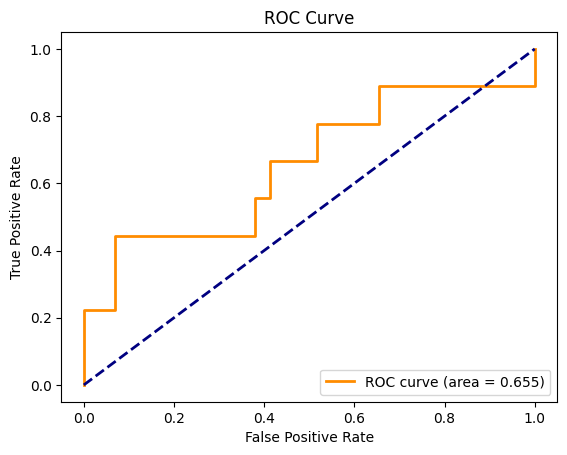

In [98]:
plot_roc(fpr1, tpr1, auc1)


#### Fitting Reduced Model 2

In [99]:
red_mod2 = smf.logit('y~Year + JP_Sales', data = df_train).fit()
red_mod2.summary()

Optimization terminated successfully.
         Current function value: 0.536171
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:                          Logit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                 0.06969
Time:                        16:01:02   Log-Likelihood:                -81.498
converged:                       True   LL-Null:                       -87.603
Covariance Type:            nonrobust   LLR p-value:                  0.002232
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -109.0296    124.062     -0.879      0.379    -352.186     134.127
Year           0.0536      0.062      0.868      0.385      -0.067       0.175
JP_Sales       2.6712      1.036      2.579      0.010       0.641       4.701
==============================================================================
"""

#### Predictive Probabilities


In [100]:
df_test['phat_test'] = red_mod2.predict(exog=df_test)
df_test['phat_test'].head() 

430    0.243489
144    0.248671
219    0.313207
14     0.189359
842    0.224492
Name: phat_test, dtype: float64

#### ROC and AUC


In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr2, tpr2, score2 = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc2 = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [102]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

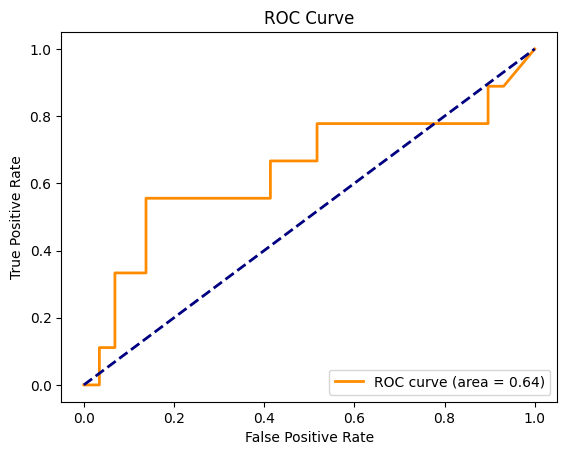

In [103]:
plot_roc(fpr2, tpr2, auc2)

### Comparison

Compare the performance of all 3 classifier models that we have selected:
* the full model
* reduced model 1
* reduced model 2


In [104]:
print('the full model has auc of:', auc)

the full model has auc of: 0.6513409961685823


In [105]:
print('the reduced model 1 has the auc of:', auc1)

the reduced model 1 has the auc of: 0.6551724137931034


In [106]:
print('the reduced model 2 has the auc of:',auc2)

the reduced model 2 has the auc of: 0.6398467432950191


Conclusion:

It actually turns out that the reduced model1 had the best performance out of all 3 classifier models. It's AUC for the test dataset was the highest. This indicates that the full classifier model had a predictive probability threshold that got the closest to having the ideal classification scenario of a fpr = 0 and a tpr = 1.

Performance Analysis:

None of these classifiers performed exceptionally well in classifying the observations in the test dataset. The reduced model1 had the highest AUC of 0.6377882909520993. This indicates that none of these logistic regression models had a predictive probability threshold that got anywhere close to yielding the ideal classification scenario of a fpr = 0 and a tpr =1 (which would have yielded an AUC of 1).
Even our best logistic regression model is much closer to an AUC of 0.5, which would be the type of classifier model performance we would expect to get if we had simpy just assigned a 1 (ie. packets) classification and 0 (ie. non-packets classification) to the data in our test dataset at random.

#### Model Comparison with Hypothesis Testing



In [109]:
test_stat = -2*(red_mod1.llf - ful_mod.llf)
print('test statistics:', test_stat)

test statistics: 0.8498390399868185


In [110]:
from scipy.stats import chi2
pvalue = 1 - chi2.cdf(test_stat, df=5)
print('p_value:', pvalue)

p_value: 0.9737461454787804


Conclusion:


Because our p-value =  0.9737461454787648 >= alpha = 0.05, 
we fail to reject our null hypothesis. Thus, there is not sufficient evidence to suggest that the reduced Model is incorrect because the missing EU_Sales and Other_Sales coefficients in Reduced Model are not zero.

#### Model Comparison with BIC Score Between Full Model and Reduced model 1

In [112]:
print('bic score of full model is', ful_mod.bic)

bic score of full model is 197.64973136757195


In [113]:
print('bic score of reduced model is', red_mod1.bic)

bic score of reduced model is 188.4518093658662


Conclusion:

BIC can measure the efficiency of the parameterized model in terms of predicting the data. BIC of the reduced model 1 is lower, which means that the reduced model 1 will perform the best with new datasets. 

Overall, red_mod1 has the best prediction performance

### Building a Classifier with Reduced Model 1

#### Evaluating FPR/TPR Combinations in the ROC Curve

Let's examine three predictive probability thresholds that we could use with our reduced model 1.

* Threshold A creates a classification of the test data with tpr = 0.44, fpr = 0.10.
* Threshold B creates a classification of the test data with tpr = 0.44, fpr = 0.34.
* Threshold C creates a classification of the test data with tpr = 0.89, fpr = 0.66.


Suppose our research goal for building this classifier model cares more about correctly classifying **non-roleplaying** games and doesn't care as much about correctly classifying **role-playing games**. Threshold C that produces a tpr = 0.89, fpr = 0.66 will be better. Because we want to accurately predict as many non-roleplaying (ie. y=0 observations) as possible, we would like for our true negative rate to be high. However, we do not care as much if we incorrectly classify a lot of roleplaying games (ie. y=1 observations). In other words, we do not care if our true positive rate is high.

### Predictive Probability Threshold of combination selected above

In [114]:
df_test['phat_test'] = ful_mod.predict(exog=df_test)
df_test['phat_test'].head() 

430    0.404216
144    0.092551
219    0.131351
14     0.152971
842    0.308349
Name: phat_test, dtype: float64

In [115]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, score = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

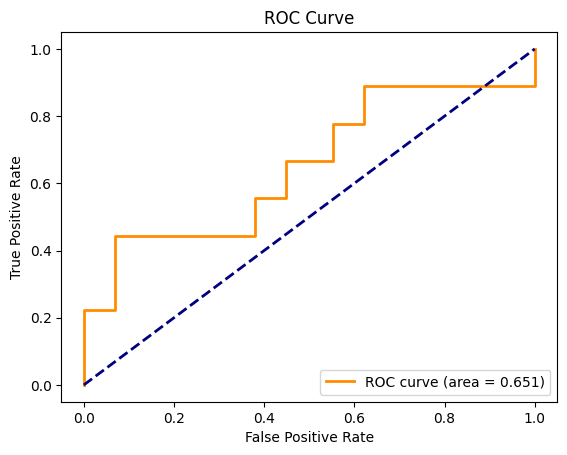

In [116]:
plot_roc(fpr, tpr, auc)

In [117]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

In [118]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold       tpr       fpr
0       0.01  0.888889  0.965517
   threshold       tpr       fpr
0       0.02  0.888889  0.965517
   threshold       tpr       fpr
0       0.03  0.888889  0.896552
   threshold       tpr       fpr
0       0.04  0.888889  0.862069
   threshold       tpr       fpr
0       0.05  0.888889  0.862069
   threshold       tpr       fpr
0       0.06  0.888889  0.793103
   threshold       tpr       fpr
0       0.07  0.888889  0.724138
   threshold       tpr       fpr
0       0.08  0.888889  0.689655
   threshold       tpr       fpr
0       0.09  0.888889  0.689655
   threshold       tpr       fpr
0        0.1  0.888889  0.655172
   threshold       tpr       fpr
0       0.11  0.888889  0.655172
   threshold       tpr       fpr
0       0.12  0.888889  0.655172
   threshold       tpr       fpr
0       0.13  0.888889  0.655172
   threshold       tpr       fpr
0       0.14  0.777778  0.586207
   threshold       tpr       f

Result:

A predictive probability threshold with $p_{0}$ = 0.1 will yeild a test data tpr =0.888889 fpr = 0.655172

### Confusion Matrix

Use this threshold to calculate a confusion matrix for the test dataset.



In [119]:
df_test['yhat'] = 1*(df_test['phat_test'] >= 0.1)
df_test.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,y,phat_test,yhat
430,Eyeshield 21: Max Devil Power,DS,2006.0,Role-Playing,0.00,0.00,0.12,0.00,1,0.404216,1
144,Medal of Honor: Warfighter,X360,2012.0,Action,0.58,0.47,0.01,0.10,0,0.092551,0
219,Tekken Tag Tournament 2,PS3,2012.0,Fighting,0.28,0.33,0.13,0.14,0,0.131351,1
14,Final Fantasy XI,X360,2006.0,Role-Playing,0.17,0.01,0.00,0.01,1,0.152971,1
842,The Penguins of Madagascar,DS,2010.0,Action,0.13,0.12,0.00,0.02,0,0.308349,1


In [120]:
tn, fp, fn, tp = confusion_matrix(y_true=df_test['y'], y_pred=df_test['yhat']).ravel()
print(tn, fp, fn, tp)

10 19 1 8


Result:

* 8 role playing games in the test dataset were correctly classified as role-playing games
* 1 role playing games in the test dataset were incorrectly classified as non-role-playing games
* 19 non-role playing games in the test dataset were correctly classified as non-role-playing games
* 10 non-role playing games in the test dataset were incorrectly classified as role-playing games

### Sensitivity and Specificity


In [121]:
sensitivity = tp/(tp+fn)
print('sensitivity:', sensitivity)

sensitivity: 0.8888888888888888


In [122]:
specificity = tn/(tn+fp)
print('specificity:', specificity)

specificity: 0.3448275862068966


## Reduced Model 1 Inference and Prediction


### Logistic Regression Equation

In [123]:
red_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  152
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                            7
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.1538
Time:                        16:12:10   Log-Likelihood:                -74.130
converged:                       True   LL-Null:                       -87.603
Covariance Type:            nonrobust   LLR p-value:                 0.0003410
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -165.0712    194.931     -0.847      0.397    -547.129     216.987
Platform[T.PS2]     -0.4944      0.687     -0.720      0.472      -1.841       0.852
Platform[T.PS3]     -1.4146      0.753     -1.879      0.060      -2.890       0.061
Platform[T.PSP]     -0.0395      0.606     -0.065      0.948      -1.227       1.148
Platform[T.X360]    -0.9416      0.743     -1.267      0.205      -2.398       0.515
Year                 0.0819      0.097      0.844      0.399      -0.108       0.272
NA_Sales            -1.2754      0.720     -1.772      0.076      -2.686       0.135
JP_Sales             3.3996      1.080      3.148      0.002       1.283       5.516
====================================================================================
"""

Equation:

$\log(\frac{\hat{p}}{(1-\hat{p})})$ = 165.0712-0.4944Platform[T.PS2]-1.4146Platform[T.PS3]-0.0395Platform[T.PSP]-0.9416Platform[T.X360] + 0.0819Year - 1.2754NA_Sales + 3.3996JP_Sales

### Probability Prediction


In [128]:
prob=red_mod1.predict(exog=dict(Platform = 'X360', Year = 2011, NA_Sales = 0.1, JP_Sales = 1.2)).iloc[0]
print('The probability of a X360 game made in 2011 with 1.2 million games sold in Japan and 0.1 million games sold in North America is NOT a role-playing game is', 1 - prob)

The probability of a X360 game made in 2011 with 1.2 million games sold in Japan and 0.1 million games sold in North America is NOT a role-playing game is 0.06643781689257489


### Classification


This game's probability prediction is below the threshold 0.1, therefore we will classify it to be non-role-playing game. 

### Odds Prediction


In [129]:
odds = prob/(1-prob)
odds

14.051668564259527

The numerical odds that this game is a role playing is 14.051668564259527 (ie. 14.051668564259527/1)
Putting this into words, we could say that the odds that this game is a role playing are 14.051668564259527 to 1. Putting these numbers into an integer format we can multiply the 14.05 and the 1 by 100.
So more succintly, we can say that the odds that this game is a role playing are 1405 to 100.

### Inference



$H_0: e^{\beta_6}=1$

$H_A: e^{\beta_6} \neq 1$

#### 99% Confidence Interval For NA_Sales

In [130]:
from scipy.stats import t, norm, f
point_estimate = -1.2754
standard_error = 0.72

critical_value =norm.ppf(0.95)

critical_value

1.6448536269514722

In [133]:
lower_bound = point_estimate - critical_value * standard_error
upper_bound = point_estimate + critical_value * standard_error

print('Confidence Interval:(', lower_bound, upper_bound, ')')

Confidence Interval:( -2.4596946114050597 -0.09110538859494022 )


In [134]:
lower_odds_mult_bound =np.exp(lower_bound)
upper_odds_mult_bound =np.exp(upper_bound)

print(lower_odds_mult_bound, upper_odds_mult_bound)

0.085461045811287 0.9129214943157129


Interpretation:

We are 99% confident that the odds multiplier for NA_Sales in the corresponding population model is between 0.085461045811287 and 0.9129214943157129

Conclusion:

Because the null value $e^{\beta_6}=1$ is outside the confidence interval, we reject the null hypothesis. Thus there is sufficient evidence to suggest $e^{\beta_6}$ (the odds multiplier for NA_Sales in the population model) is not equal to 1.

(Or in other words, there is sufficient evidence to suggest that there is a relationship between role playing games and the Sales in NA for all games in this corresponding population model).

In [135]:
null_value=0

test_stat=(point_estimate-null_value)/standard_error
print("Test Statistic: ",test_stat)

Test Statistic:  -1.7713888888888891


In [136]:
p_value=2*(1-norm.cdf(np.abs(test_stat)))
print('pvalue: ', p_value)

pvalue:  0.07649605499806844


Conclusion:

Because the $p-value = 0.07649605499806844 < \alpha=0.05$ we reject the null hypothesis. Thus there is sufficient evidence to suggest $e^{\beta_6}$ (the odds multiplier for NA_Sakes in the population model) is not equal to 1.

(Or in other words, there is sufficient evidence to suggest that there is a relationship between role playing games and the Sales in NA for all games in this corresponding population model).

there is sufficient evidence to suggest that there is a relationship between whether or not the game is a role-playing game and the Sales in NA for all games in this corresponding population model

## Section 5: Overall Summary

The presented data science project, titled "Regional Video Games Sales," focuses on analyzing video game sales across different regions globally. The project utilizes a dataset named **sample_game_sales.csv**, containing attributes such as game name, platform, release year, genre, and sales in North America, Europe, Japan, and other regions. The analysis begins with data preprocessing and cleaning, including filtering for specific genres like Action, Role-Playing, Fighting, and Shooter. Exploratory Data Analysis (EDA) examines numerical variable pairwise relationships, revealing insights into the strength of associations between variables, genre-specific sales in Japanese and North American markets, and the relationship between platforms and genres. The project also delves into statistical inference and visualization techniques, such as hypothesis testing, confidence intervals, and linear regression.

The latter part of the project focuses on building predictive models and classifiers. It explores linear regression models for predicting North American game sales, utilizing both non-regularized and LASSO regression. The analysis compares these models and concludes that the non-regularized linear regression performs better. Additionally, logistic regression models are developed to classify games into Role-Playing or other genres, with the best-performing model identified through cross-validation. The project concludes with an evaluation of classifier performance, ROC curve analysis, and the selection of a predictive probability threshold for optimal classification. The analysis provides valuable insights into the factors influencing video game sales and offers predictive models for future sales and genre classification.

# 🙏🏻🙏🏻🙏🏻 Some Extra Please 🙏🏻🙏🏻🙏🏻